# Introduction 

In [6]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn
%pip install notebook

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report

Hello once again! I am your lovely host, no you are not getting my name, so just call me Dokja or something. Anyway, today I will be talking about the game that everyone loves to hate on, where the popular series Arcane came from, where the stinkiest and potentially the most toxic players have some strange embedded community. League of Legends. 

I know, I know, you can put the deodorant away, these players actually took a shower. There shouldn't be any smelliness from stuff, hopefully. What we will being exploring is ironically trying to find a way to improve the quality of life for ranked League of Legends players. My dataset that was made by a lovely individual is called "Games.csv", of course I am not insane enough to refer to it within the quotation marks. 

# Pre-Processing Data
Of course your boy has to clean up the information, do the usual thing which is reading the file.

In [3]:
df = pd.read_csv("games.csv")
print(df.columns.tolist())

['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5']


So, of course we got our list of data points, about a good chunk of that is not actually going to be important. Mostly because the character IDs are just not necessarily important, same goes with the ban. Mostly because character choices are going to change based in any buffs or nerfs that a character may recieve within a specific season. Plus seasons are going to change some minor things in some cases. 

For people who, luckily, do not know anything regarding League of Legends, there are different achievements that people can gain while playing the game through the match. First Blood refers to the first kill that is taken within the game, which can typically change how the game goes based on whether or not the group is good enough to cover for the now missing member. First tower is just who destroys the first tower, which may imply which group is more likely to lose. The Inhibitor is what allows the Nexus to be destroyed and leads to the game being ended.

From there we get to the buffs, Baron, Dragon, and Rift Heralds are all a sort of boss that spawns in after a specific amount of time passes within the game. Baron grants bonuses to attack damage, ability power, "Empowered Recall", and an aura that increases the power of minions. The dragons all change and there is a random chance in receiving whichever dragon, I will not be wasting either of our times to focus on those different buffs and what each dragon brings. Don't worry, I link the League of Legends wiki, because some of us, like me, do not have a life. Anyway, Rift Herald, finally, a boss that doesn't have seven forms. The Rift Herald just allows you to summon it after you kill it, as if working your nine to five was more important than actually staying dead. 

In [4]:
team1cols = [col for col in df.columns if col.startswith("t1_")]
team2cols = [col for col in df.columns if col.startswith("t2_")]

t1 = df[team1cols].copy()
t2 = df[team2cols].copy()

t1.columns = [c.replace("t1_","") for c in team1cols]
t2.columns = [c.replace("t2_","") for c in team2cols]

t1['win'] = (df['winner'] == 1).astype(int)
t2['win'] = (df['winner'] == 1).astype(int)

t1['gameId'] = df['gameId']
t2['gameId'] = df['gameId']

teams = pd.concat([t1,t2], axis = 0).reset_index(drop=True)
teams.head()

,champ1id,champ1_sum1,champ1_sum2,champ2id,champ2_sum1,champ2_sum2,champ3id,champ3_sum1,champ3_sum2,champ4id,...,baronKills,dragonKills,riftHeraldKills,ban1,ban2,ban3,ban4,ban5,win,gameId
0,8,12,4,432,3,4,96,4,7,11,...,2,3,0,92,40,69,119,141,1,3326086514
1,119,7,4,39,12,4,76,4,3,10,...,0,2,1,51,122,17,498,19,1,3229566029
2,18,4,7,141,11,4,267,3,4,68,...,1,1,0,117,40,29,16,53,1,3327363504
3,57,4,12,63,4,14,29,4,7,61,...,1,2,0,238,67,516,114,31,1,3326856598
4,19,4,12,29,11,4,40,4,3,119,...,1,3,0,90,64,412,25,31,1,3330080762


It may have taken me at least five to six hours to actually make this function, turns out that if you cannot spell, there will be a lot of coding issues. Please do not ask me if teams is a real word or not, I do not know, I am currently staring at the ceiling like I am insane. Anyway, as you can see, I tried my best to be able to try to organize everything within columns so that the information would be somewhat be more legible, especially as I attempt to make columns and rows based on the teams themselves. Of course there was too much information from the 50,000+ datasets that were included with the information. 

# Data Visualization and Understanding 

So now, I will focus on trying to build a graph so that we can have a more visual graph that could be utilized, cause of course this sort of information may not be the best. Though my goal is not to rate the actual performance of both teams but to focus on the differences that occured between the two and what could be done to improve the quality of their time within the game. 

In [5]:
feature_cols = ["towerKills", "inhibitorKills", "baronKills", "dragonKills", "riftHeraldKills"]
x = teams[feature_cols]
y = teams["win"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.511895513691979


So, honestly, I wasn't actually expecting to actually be able to do linear regression. Saw a little tidbit about linear regression and tried my best to research what I could about this. So, there is not a lot that could necessarily be said. Having the buffs and the first kills of the towers typically shown which group would be more likely to win. Which is expected. 

Though, we need more of a visualization so I am going to make a poor man's attempt at a heatmap.

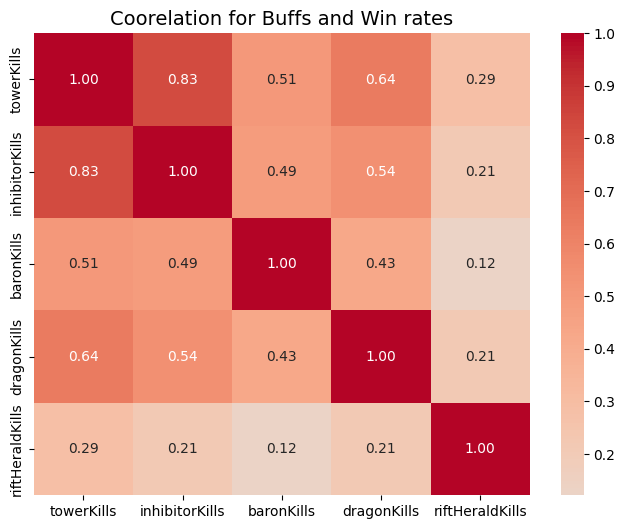

In [8]:
buffs = ['towerKills', "inhibitorKills", "baronKills", "dragonKills", "riftHeraldKills"]

corr = teams[buffs].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Coorelation for Buffs and Win rates", fontsize=14)
plt.show()

So, as we can see from the heatmap, whenever players recieved the first tower kill, they were more than likely able to also recieve some of the other buffs such as the inhibitor. The highest chance of them winning always seems to coincide with being the first one to get the tower kill.

# Modeling

So, for this project I used the scikit learning, matplotlib, and the seaborn. This all culminated because, I needed to learn the scikit to try to utilize a model that would be able to learn, which given that this is over 50k data points, was certainly a way to actually attempt to see if it would learn or not. My apologizes to the pseudo AI and the misfortunate machine learning that had to deal with my forsaken antics. Aside from that, matplotlib and seaborn were used decently well to actually make the heatmap. 

It gave me a form of visualization that I could utilize because I am not the greatest at actually figuring out a lot of methods or added features from these language models, given that this class is within a small period of time, work on top of everything, and I also question my own sanity. May the Eldtrich Gods that I made a pact with to get a smidge of coding knowledge get some form of credit. Not that I actually sold my soul out, no, I just make offerings of small candy and the occasional insane ramble that my friends have to deal with. 

# Evaluation 

My modeling method actually did pretty well, I thank the creators of seaborn, matplotlib, and scikit learning for their hard earned work. If I had to make any of these, I think I would genuinely cry. 

Given that this was such a large dataset, they did amazinng, have no issues and do not think that there are any problems with what went on. 

# Storytelling 

I learned that I am not entirely insane, love scikit learning and will definitely use it for a future project, but I will also continue my offerings to the dark gods, may they be invested in my learning because not a lot of people are. Turns out if you treat everything as a TV show, you can be a funny person, or you could be considered a weirdo. I just think that it is funny to ramble like this because the TAs that read this or the professor (Hi! Sorry that I turned this in late, it is purely my own mistake, hope y'all are having a good week, get well prof! <3) and I might just start writing random bullshit at some point. Maybe I can make a while ramble about Hermes for a while and then I will suddenly find myself lost on a path because someone decided that my joke wasn't too funny. Which I have gotten lost before, so.

Anyway, the data showed that there is a correlation between the buffs and tower kills that does promote the thought that a group will more likely win or not. There is a likely chance that there will be enough players that would rather give up on a game than actually continue as even thw slightest push that succeeded too well, would be enough to discourage them or make them question whether the game was worth continuing. Which cannot be achieved in a healthy manner as some people may not wish to quit every game because of their teammates or small tinks within the armor of their group.

Providing additional buffs that may not be as powerful and that do not rely on a teammate's ability to perform with a specific ability may even allow players to enjoy a game based on whether they will go for larger bosses or smaller bosses with a lesser buff, it will also increase game times and invest in new strategies as now there will be a question on whether a buff is worth it or not, or whether the smaller or larger bosses can be handled with a larger or smaller group. Junglers, players who specialize in moving between lanes and being the reason for some of the smaller buffs that are solely for that character, may have to learn how to specalize or do better in single combat with AI combatants. 

# Impact 

Of course, I am making a recommendation that is absolute bullshit and people may very well call me some form of a mad man, a goober if you will. Truly, that is my intent, to promote an idea that may add some changes that players will question. For what is innovation if we are not going to completely throw certain things into chaos. But what I desire is simple, silliness, I want to be known as the goober who could. 

# Resources
https://www.kaggle.com/datasets/datasnaek/league-of-legends?select=games.csv 

https://wiki.leagueoflegends.com/en-us/Baron_Nashor

https://wiki.leagueoflegends.com/en-us/Dragon_pit

https://wiki.leagueoflegends.com/en-us/Rift_Herald

ChatGbt was a help to teaching me how to utilize Seaborn and assisted me with the Heatmap